In [1]:
import json
metrics = json.load(open(r'..\..\dat\predictions\metrics.json'))
metrics

{'hysteresis': [{'mae': {'linreg': 0.44769512736927053,
    'nn': 0.6529254881133907,
    'lstm': 0.4767706065074714,
    'kan': 0.44591821656771813},
   'mse': {'linreg': 0.3221376013098881,
    'nn': 0.6932016339352833,
    'lstm': 0.36107795492029643,
    'kan': 0.3196926932906863}},
  {'mae': {'linreg': 2.089215719361957,
    'nn': 2.235869755160302,
    'lstm': 3.5497682337083796,
    'kan': 2.0393134813704794},
   'mse': {'linreg': 4.721070864570317,
    'nn': 7.263337118179735,
    'lstm': 13.202368943724354,
    'kan': 5.6523088906999455}}],
 'creep': [{'mae': {'linreg': 0.44451560471723006,
    'nn': 1.0504931433079077,
    'lstm': 0.44028779225374526,
    'kan': 0.4429772951370507},
   'mse': {'linreg': 0.3097111809146022,
    'nn': 1.3692105910792791,
    'lstm': 0.30319217991156977,
    'kan': 0.3072042353232538}},
  {'mae': {'linreg': 0.5964077147270604,
    'nn': 1.023351535692779,
    'lstm': 0.6153650216156983,
    'kan': 0.5991535275791541},
   'mse': {'linreg': 0.5563

In [2]:
metrics["hysteresis"] = metrics["hysteresis"][0]

mean_creep_metric = {'mae': {'nn': 0.,
    'lstm': 0.,
    'kan': 0.,
    'linreg': 0.},
    'mse': {'nn': 0.,
    'lstm': 0.,
    'kan': 0.,
    'linreg': 0.}}

for run in metrics['creep']:
    for model in run['mae']:
        mean_creep_metric['mae'][model] += run['mae'][model]
    for model in run['mse']:
        mean_creep_metric['mse'][model] += run['mse'][model]

for model in mean_creep_metric['mae']:
    mean_creep_metric['mae'][model] /= len(metrics['creep'])
    mean_creep_metric['mse'][model] /= len(metrics['creep'])
mean_creep_metric
metrics['creep'] = mean_creep_metric
metrics
    

{'hysteresis': {'mae': {'linreg': 0.44769512736927053,
   'nn': 0.6529254881133907,
   'lstm': 0.4767706065074714,
   'kan': 0.44591821656771813},
  'mse': {'linreg': 0.3221376013098881,
   'nn': 0.6932016339352833,
   'lstm': 0.36107795492029643,
   'kan': 0.3196926932906863}},
 'creep': {'mae': {'nn': 0.9406411254479478,
   'lstm': 0.5605535137289814,
   'kan': 0.542759591236834,
   'linreg': 0.5459292120081112},
  'mse': {'nn': 1.3358065139305735,
   'lstm': 0.5025409127748329,
   'kan': 0.4740044870322572,
   'linreg': 0.4789244726805813}}}

In [5]:
import numpy as np
def turn_to_np_rgb(hex_color, coloration=1):
    return (np.array( list(bytes.fromhex(hex_color)) )/ 255.0)*coloration
PRIMARY_COLORS = [
    # turn_to_np_rgb("253494"), #253494,
    # turn_to_np_rgb("EC6634"), #EC6634
    # turn_to_np_rgb("33b983"), #33b983
    # turn_to_np_rgb("BB5566"), #BB5566
    turn_to_np_rgb("5D3E94"),  #5D3E94
    turn_to_np_rgb("33b983"), #33b983
    turn_to_np_rgb("BD22AB"), #BD22AB
    turn_to_np_rgb("4786DE"), #4786DE
]

C:\Users\David\AppData\Local\Temp\ipykernel_12440\3066523622.py:40: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


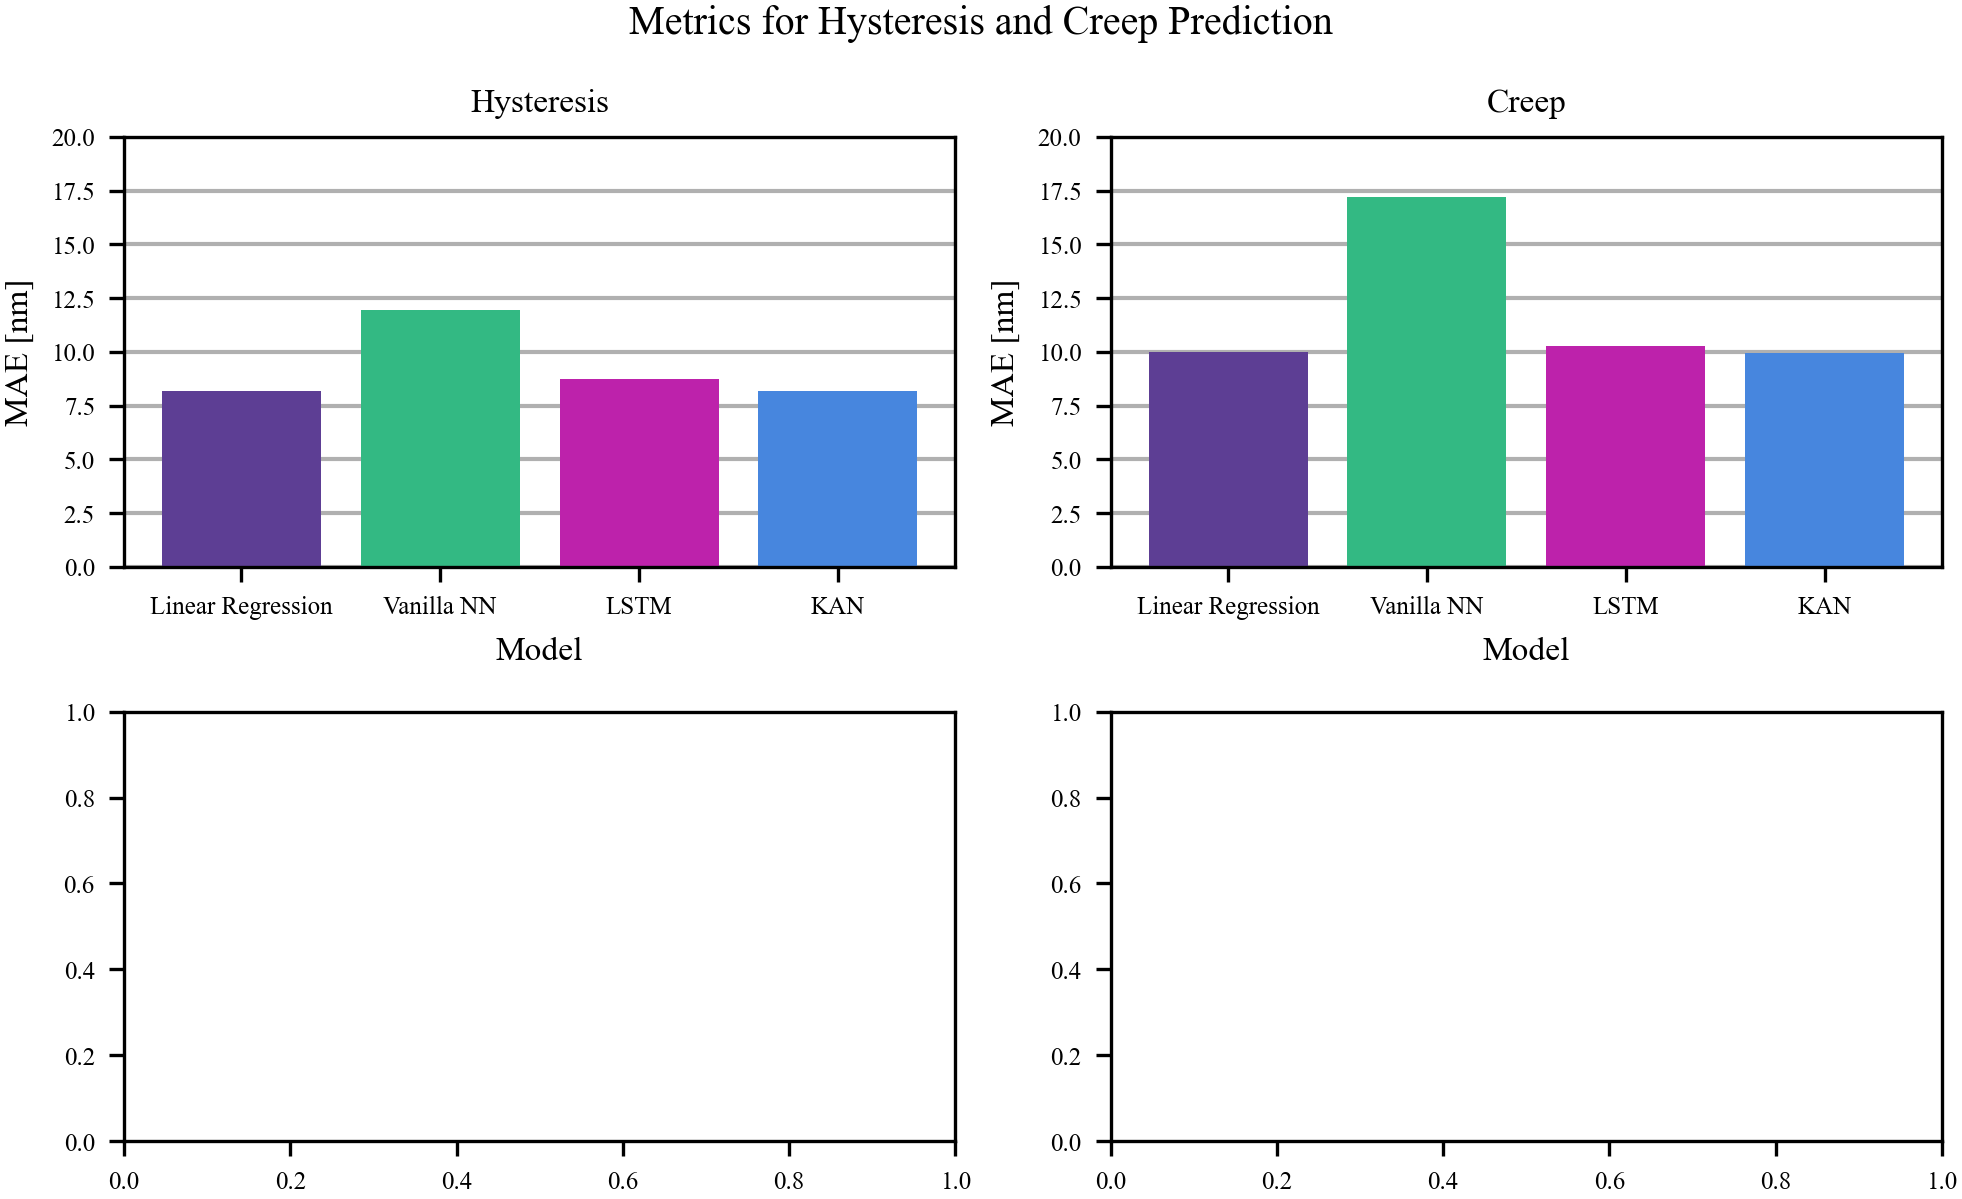

In [30]:
import matplotlib.pyplot as plt
from tueplots import bundles
import numpy as np
import pandas as pd

plt.rcParams.update({"figure.dpi": 300})
plt.rcParams.update(bundles.icml2022(column="full", family="serif", usetex=False, nrows=1, ncols=1))
plt.rcParams['font.serif'] = "Times New Roman"

fig, axs = plt.subplots(2, 2)

types = ['hysteresis', 'creep']
types_labels = ['Hysteresis', 'Creep']
metric = ['mae', 'mse']
metric_labels = ['MAE [nm]', 'Mean Squared Error']

models = ['linreg', 'nn', 'lstm', 'kan']
model_labels = ['Linear Regression', 'Vanilla NN', 'LSTM', 'KAN']


for j, (t, t_l) in enumerate(zip(types, types_labels)):
    for i, (m, m_l) in enumerate(zip(metric, metric_labels)):
        data = []
        for k, (model, model_l) in enumerate(zip(models, model_labels)):
            data.append(metrics[t][m][model]* 1.2*np.power(10, 6)/np.power(2, 16))
        axs[i, j].bar(model_labels, data, color=PRIMARY_COLORS)
        axs[i, j].set_title(f"{t_l}")
        axs[i, j].set_ylabel(f"{m_l}")
        axs[i, j].set_xlabel("Model")
        axs[i, j].set_ylim(0, 20)
        #axs[i, j].set_yticks(np.linspace(0, 1, 5))
        axs[i, j].grid(True, axis='y', linestyle='-', linewidth=1)
        axs[i, j].set_axisbelow(True)
        break

        
        
plt.suptitle("Metrics for Hysteresis and Creep Prediction")
# Adjust layout to prevent overlapping elements
plt.tight_layout()
plt.savefig(r'.\fig_metrics.pdf')
# Show the plot
plt.show()